In [1]:
exec(open("inc_notebook.py").read())

current working dirF:\myProjects\tfKeras\UCSC\CMPS242\earthquake


In [2]:
import logging, sys, math,os
exec(open("estimator/initKeras.py").read())


Using TensorFlow backend.


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
if sys.modules.get( 'library.MultipleBinDataGenerator', False ) != False :
    del sys.modules['library.MultipleBinDataGenerator'] 
if sys.modules.get( 'MultipleBinDataGenerator', False ) != False :
    del sys.modules['MultipleBinDataGenerator'] 
from library.MultipleBinDataGenerator import *

logging.warning( "MultipleBinDataGenerator loaded" )

trainGenerator = MultipleBinDataGenerator(batch_size=16, windowSize = 36, stride = 6)

D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator RobustScaler from version 0.20.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [6]:
if sys.modules.get( 'estimator.EstimatorIO', False ) != False :
    del sys.modules['estimator.EstimatorIO'] 
if sys.modules.get( 'EstimatorIO', False ) != False :
    del sys.modules['EstimatorIO'] 
from estimator.EstimatorIO import *

logging.warning( "EstimatorIO loaded" )

estimatorIO = EstimatorIO()

In [7]:
trainGenerator.__len__()

1599

In [8]:
model_input = layers.Input( shape = ( 15 + 6 * 27 + 2 + 15+ 3 * 27,  ) )

In [9]:
x = layers.Dense(64)(model_input)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dense(32)(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Dense(48)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(8)(x)
x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Dense(1, activation=activations.relu)(x)

model = models.Model(model_input, x, name = "TinyFFN")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 275)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                17664     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 48)                1584      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 48)                0         
__________

In [10]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss = losses.MSE,
             metrics = [metrics.MSE, metrics.MAE])

In [11]:
sys.path.remove(str(projectFolder))
os.chdir(currentFolder)

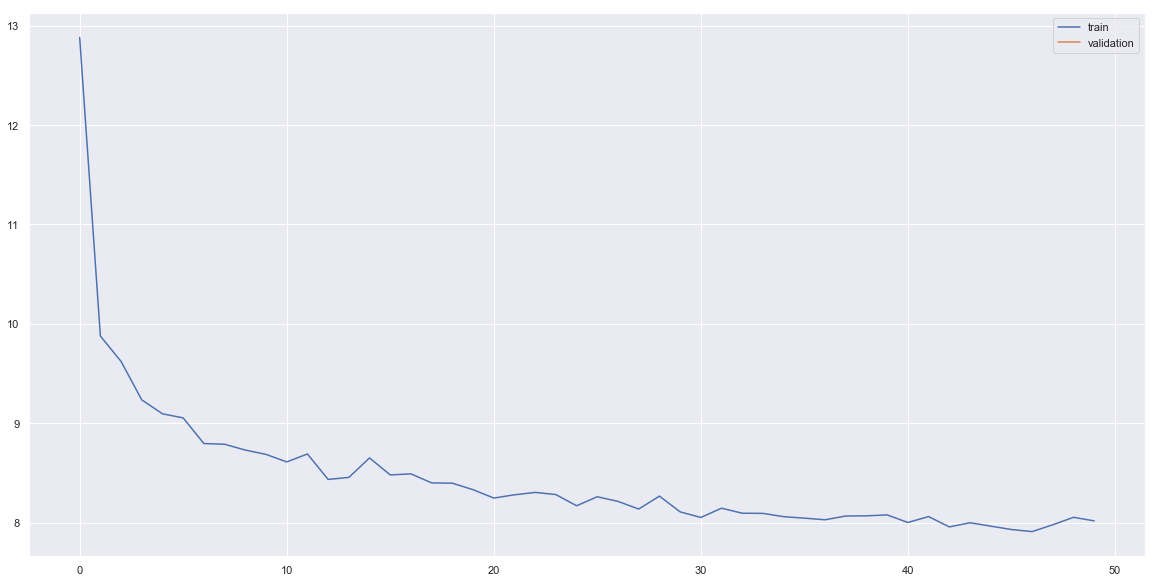

In [12]:
np.seterr(invalid='ignore')
np.warnings.filterwarnings('ignore')
history = model.fit_generator( generator=trainGenerator,
                    use_multiprocessing=False, 
                    workers=2, 
                    initial_epoch = 0,
                    epochs=50,
                    max_q_size = 10,
                    steps_per_epoch = trainGenerator.__len__(),
                    callbacks = [livePlotKeras]
                   )

In [13]:
estimatorIO.save(model, model.name)